In [1]:
import os
import subprocess

geomstats_gitroot_path = subprocess.check_output(
    ['git', 'rev-parse', '--show-toplevel'],
    universal_newlines=True)

os.chdir(geomstats_gitroot_path[:-1])

print('Working directory: ', os.getcwd())

Working directory:  /home/curt/projects/python-first


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geomstats.backend as gs
from geomstats.geometry.euclidean import Euclidean
from geomstats.geometry.discrete_curves import DiscreteCurves

INFO: Using numpy backend


## plane curves

In [3]:
r2 = Euclidean(dim=2)
curves_r2 = DiscreteCurves(ambient_manifold=r2)

parametrized_curve_a = lambda x: gs.transpose(gs.array([1 + 2 * gs.sin(gs.pi * x), 3 + 2 * gs.cos(gs.pi * x)]))
parametrized_curve_b = lambda x: gs.transpose(gs.array([5 * gs.ones(len(x)), 4 * (1 - x) + 1]))

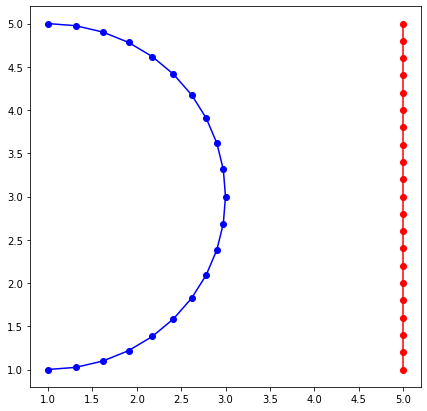

In [4]:
n_sampling_points = 20
sampling_points = gs.linspace(0., 1., n_sampling_points + 1)
curve_a = parametrized_curve_a(sampling_points)
curve_b = parametrized_curve_b(sampling_points)

plt.figure(figsize=(7, 7))
plt.plot(curve_a[:, 0], curve_a[:, 1], 'o-b')
plt.plot(curve_b[:, 0], curve_b[:, 1], 'o-r')
plt.show()

## Distance between parameterized curves

In [5]:
curves_r2.square_root_velocity_metric.dist(point_a=curve_a, point_b=curve_b)

1.924866967405097

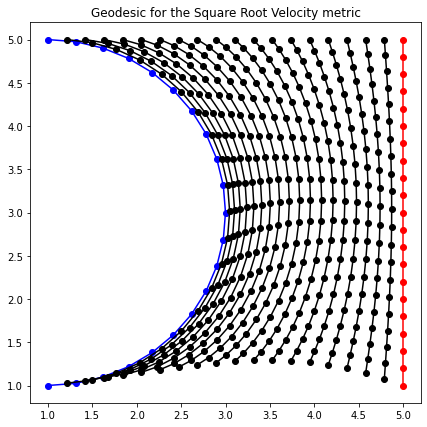

In [6]:
geod_fun = curves_r2.square_root_velocity_metric.geodesic(initial_curve=curve_a, end_curve=curve_b)

n_times = 20
times = gs.linspace(0., 1., n_times)
geod = geod_fun(times)

plt.figure(figsize=(7, 7))
plt.plot(geod[0, :, 0], geod[0, :, 1], 'o-b')
for i in range(1, n_times - 1):
    plt.plot(geod[i, :, 0], geod[i, :, 1], 'o-k')
plt.plot(geod[-1, :, 0], geod[-1, :, 1], 'o-r')
plt.title('Geodesic for the Square Root Velocity metric')
plt.show()

In [7]:
curve_a_resampled = parametrized_curve_a(sampling_points ** 2)
curve_b_resampled = parametrized_curve_b(sampling_points ** 2)

curves_r2.square_root_velocity_metric.dist(curve_a_resampled, curve_b_resampled)

1.9224597300658097

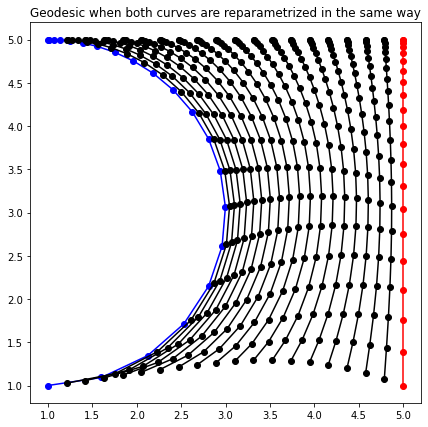

In [8]:
geod_fun_1 = curves_r2.square_root_velocity_metric.geodesic(curve_a_resampled, curve_b_resampled)
geod_1 = geod_fun_1(times)

plt.figure(figsize=(7, 7))
plt.plot(geod_1[0, :, 0], geod_1[0, :, 1], 'o-b')
for i in range(1, n_times - 1):
    plt.plot(geod_1[i, :, 0], geod_1[i, :, 1], 'o-k')
plt.plot(geod_1[-1, :, 0], geod_1[-1, :, 1], 'o-r')
plt.title('Geodesic when both curves are reparametrized in the same way')
plt.show()

## 3D curves

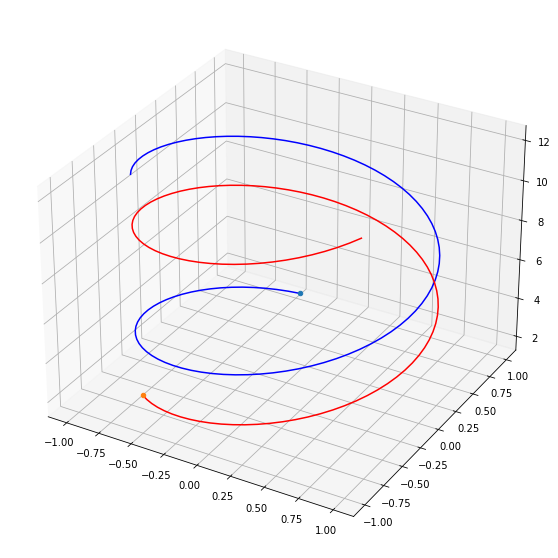

In [9]:
r3 = Euclidean(dim=3)
curves_r3 = DiscreteCurves(ambient_manifold=r3)

parametrized_curve_a = lambda x: gs.transpose(gs.stack((gs.cos(2 + 8 * x), gs.sin(2 + 8 * x), 2 + 10 * x)))
parametrized_curve_b = lambda x: gs.transpose(gs.stack((gs.cos(4 + 8 * x), gs.sin(4 + 8 * x), 2 + 10 * x)))

n_sampling_points = 100
sampling_points = gs.linspace(0., 1., n_sampling_points)
curve_a = parametrized_curve_a(sampling_points)
curve_b = parametrized_curve_b(sampling_points)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(curve_a[:, 0], curve_a[:, 1], curve_a[:, 2], 'b')
ax.plot(curve_b[:, 0], curve_b[:, 1], curve_b[:, 2], 'r')
ax.scatter(curve_a[0, 0], curve_a[0, 1], curve_a[0, 2], 'b')
ax.scatter(curve_b[0, 0], curve_b[0, 1], curve_b[0, 2], 'r')
plt.show()

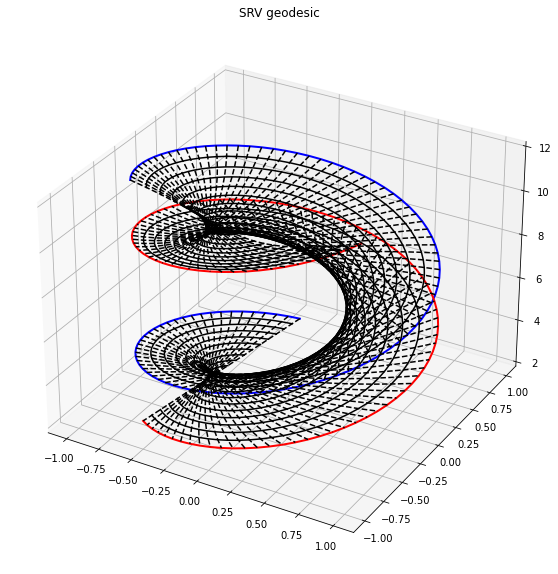

In [10]:
geod_fun = curves_r3.square_root_velocity_metric.geodesic(initial_curve=curve_a, end_curve=curve_b)

n_times = 20
t = gs.linspace(0., 1., n_times)
geod = geod_fun(t)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(curve_a[:, 0], curve_a[:, 1], curve_a[:, 2], '-', c='b', linewidth=2)
ax.plot(curve_b[:, 0], curve_b[:, 1], curve_b[:, 2], '-', c='r', linewidth=2)
for i in range(1, n_times - 1):
    ax.plot(geod[i, :, 0], geod[i, :, 1], geod[i, :, 2], '-', c='k')
for j in range(n_sampling_points):
    ax.plot(geod[:, j, 0], geod[:, j, 1], geod[:, j, 2], '--', c='k')
plt.title('SRV geodesic')
plt.show()

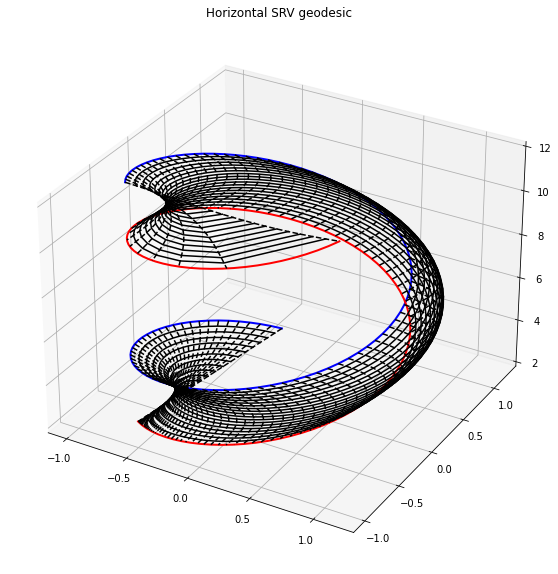

In [12]:
hgeod_fun = curves_r3.quotient_square_root_velocity_metric.horizontal_geodesic(curve_a, curve_b)
hgeod = hgeod_fun(t)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(curve_a[:, 0], curve_a[:, 1], curve_a[:, 2], '-', c='b', linewidth=2)
ax.plot(curve_b[:, 0], curve_b[:, 1], curve_b[:, 2], '-', c='r', linewidth=2)
for i in range(1, n_times - 1):
    ax.plot(hgeod[i, :, 0], hgeod[i, :, 1], hgeod[i, :, 2], '-', c='k')
for j in range(n_sampling_points):
    ax.plot(hgeod[:, j, 0], hgeod[:, j, 1], hgeod[:, j, 2], '--', c='k')
plt.title('Horizontal SRV geodesic')
plt.show()

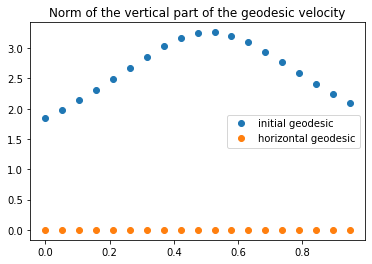

In [13]:
geod_velocity = n_times * (geod[1:] - geod[:-1])
geod_velocity_hor, geod_velocity_ver, _ = (
    curves_r2.quotient_square_root_velocity_metric.split_horizontal_vertical(geod_velocity, geod[:-1])
)
geod_vertical_norm = curves_r2.square_root_velocity_metric.norm(geod_velocity_ver, geod[:-1])

hgeod_velocity = n_times * (hgeod[1:] - hgeod[:-1])
hgeod_velocity_hor, hgeod_velocity_ver, _ = (
    curves_r2.quotient_square_root_velocity_metric.split_horizontal_vertical(hgeod_velocity, hgeod[:-1])
)
hgeod_vertical_norm = curves_r2.square_root_velocity_metric.norm(hgeod_velocity_ver, hgeod[:-1])

plt.figure()
plt.plot(times[:-1], geod_vertical_norm, 'o', label='initial geodesic')
plt.plot(times[:-1], hgeod_vertical_norm, 'o', label='horizontal geodesic')
plt.legend()
plt.title('Norm of the vertical part of the geodesic velocity')
plt.show()